# Predicting Insurance Premiums

## Linear Regression with Scikit Learn - Machine Learning with Python
![](https://miro.medium.com/max/1400/1*kXLixIx8LXvLJUUc07bBeg.jpeg)

The following topics are covered in this analysis:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

## Problem Statement
> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/Atif2227/Machine-Learning-/main/Linear%20Regression%20Simple%20%26%20Multiple/medical.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
>
> Dataset source: https://github.com/Atif2227/Machine-Learning-/blob/main/Linear%20Regression%20Simple%20%26%20Multiple/medical-charges.csv


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:
 
 1. The annual medical expenditure would determine the annual pemium payment by the customers. Means if the annual medical expense is more then the company would charge more as the annual premium inorder to make a profit.
 2. Do some Basic EDA/Visualization to look for some relation and dependencies among the attributes.
 3. Find the strongest co-relation between attribute/s and charges.
 4. The attribute/s with strongest co-relation could be used for training, testing and validation.
 5. Further the model based on above inference could be used for prediction.



# Importing the Important Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install plotly
import plotly.express as px
import seaborn as sns
color = sns.color_palette()
import numpy as np
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

## Downloading the Data

To begin, let's download the data using the `urlretrieve` function from `urllib.request`.

In [129]:
medical_charges_url = 'https://raw.githubusercontent.com/Atif2227/Machine-Learning-/main/Linear%20Regression%20Simple%20%26%20Multiple/medical.csv'

In [130]:
from urllib.request import urlretrieve

In [131]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x282cb935d30>)

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [132]:
medical_df = pd.read_csv('medical.csv')

In [133]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [134]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [135]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seems reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


> **EXERCISE**: What other inferences can you draw by looking at the table above? Add your inferences below:
>
> 1. The columns like 'age' and 'bmi' seems to be distributed evenly, as their min, 25%, 50% 75% and max values have similar range.
> 2. Where as the column children and charges are highly skewed.



## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization. 

The following settings will improve the default style and font sizes for our charts.

In [136]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Let's see how Age, Sex, BMI, Children, Smoker, Region and Charges are distributed.

### Age 

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [137]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [138]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.



> **EXERCISE**: Can you explain why there are over twice as many customers with ages 18 and 19, compared to other ages?
>
> At 18 an individual truns eligible for having ensurance and there is an strong probability that the insurance company might be providing lower insurance premeium. 


### Sex

Let's look at the distribution of BMI sex of customers, using a histogram and box plot.

In [139]:
fig = px.histogram(medical_df,
               x= 'sex',
               color='smoker',
               title='Distribution of SEX')
fig.show()

Looks like the population is equaly distributed between male and female but smoker males are comparitively more than smoker females

### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [140]:
fig = px.histogram(medical_df,
               x= 'bmi',
               marginal = 'box',
               color_discrete_sequence=['red'],
               title='Distribution of BMI (Body Mass Index)')
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

> **EXERCISE**: Can you explain why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
>As per studies, most of the people in the population are above under weight to slightly over weight and thus for this age group the BMI lies between 24 to 38. Whereas there are few people as compared to the previously mention weight category who are either under weight or over weight. Thus population with lower and higher BMI is comparitively less.   
> Let's plot a line diagram between 'age' and 'bmi'.

### Children

Let's look at the distribution of children of customers, using a histogram and box plot.

In [141]:
fig = px.histogram(medical_df,
               x= 'children',
               color='children',   
               title='Distribution of Children')
fig.show()

Most of the population has no child and there are very few people having 5 children. It would be interesting to see if chilren has any relation with charges or not.

## Smoker
Look at the distribution of smoker and non-smokers within the population.

In [142]:
fig = px.histogram(medical_df, 
                   x='smoker', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Distribution of Smokers & Non-Smokers')
fig.update_layout(bargap=0.1)
fig.show()

Vast majority of population is non-smoker which is good.

## Region
Let's visualize the distribution of population in different regions.

In [143]:
fig = px.histogram(medical_df, 
                   x='region',  
                   color='region', 
                   title='Distribution of Regions')
fig.update_layout(bargap=0.1)
fig.show()

Population among different region is almost equally distributed except slightly more for southeast, they may have more children than other region.

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [144]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'red'], 
                   title='Distribution of Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law".
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

So it's very much evident that less people smoke as compared to non-smokers and smoking increases charges too.

## Having looked at individual columns, we can now visualize the distribution/relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [145]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age and Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

> **EXERCISE**: What other inferences can you draw from the above chart?
>
> So, with the above scatter plot we have 3 clusturs.
The 1st clustur shows, all the plopulation is non smoker and charges increases with age.
The 2nd clustur shows that there is a mix population of smoker and non smoker. But the charges remain higher that the non smoker clustur and even for this clustur the charges increases with age.
The 3rd clustur show that the population is smoker and hence they have highest charges and even in this culstur charges increases with age.

>#### So it can be concluded that people who smoke have higher annual charges and the annual charges increase with age irrespective of the smoking habit.
>#### There are some cases where the population is non smoker but they still have high charge and this culd be because of various external features such as, any accident or any other body ailment.

### Sex and Charges

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [146]:
fig = px.box(medical_df, 
                 x='sex', 
                 y='charges', 
                 color='smoker',
                 hover_data=['sex'], 
                 title='Age and Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that median charges for smoker females are slightly more than smoker males. Even the outliers for smoker females seems to be more above than smoker males. The reason behind this could be that smoker females might get more sick than smoker males.

However non-smoker male median charge is far more that non-smoker females. This might be because of some major body ailment, accident or other external factor which is more obvious for males.

Overall, it seems that sex could not be a good measure to decide for medical charges.

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [147]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

#### What other insights can you gather from the above graph?

#### Answer 
With the above scatter plot it is clear that there is no direct linear relation between BMI and charges. 
For non-smokers the BMI increases but the charges remains around 0 t0 20000 (With some outliers/exception: May be due to some other medical condition).
For smokers-BMI, the charges is usually more than non-smokers-BMI. But when BMI Exceeds 30 there is steep increase in charges for smokers-BMI.

### Children and charges

In [148]:
px.box(medical_df, x= 'children', y= 'charges', title='Children & Charges' )

1. The minimum charges increases with increasing children.
2. There is no clear relation between children and charges.

### Smoker and Charges

In [149]:
px.box(medical_df, x= 'smoker', y= 'charges', title='Region & Charges' , color='smoker')

It is very much clear that smoker has clear relation with charges.
Smoker has more annual charges than non-smokers.

### Region and charges

In [150]:
px.box(medical_df, x= 'region', y= 'charges', title='Region & Charges' )

There is no trend or evidence which could say that population belonging to a particular region may have increased or decreased annual charges.
No clear relation between region and charges found.

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't. Moreover smokers has more charges than non-smokers.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [151]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [152]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [153]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

smoker has a better correlation than bmi and age.




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [154]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

Let's arrange this table in acending order by charges column in order to get the top attributes with highest correlation with charges.

In [155]:
medical_df_cor = medical_df.corr()

In [156]:
med_df_cor_asc = medical_df_cor.sort_values(by='charges')
med_df_cor_asc

,age,bmi,children,charges
children,0.042469,0.012759,1.000000,0.067998
bmi,0.109272,1.000000,0.012759,0.198341
age,1.000000,0.109272,0.042469,0.299008
charges,0.299008,0.198341,0.067998,1.000000


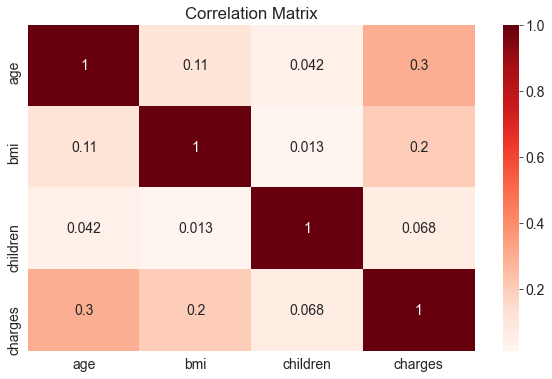

In [157]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

It is very much evident with the help of correlation table and correlation heat map that 'age' and 'bmi' attributes have the higest correlation with charges. Thus we can use these two as our independent variables for predicting the annual medical charges.

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

## Linear Regression using a Single Feature

We now know that the "age" and "bmi" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "bmi" first, then we can use "age" later.

>#### We will do the basics of linear ligression by own with codes, in order to understand what all procedure goes behind the scene.

In [158]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $bmi$, $w$ and $b$.


In [159]:
def estimate_charges(bmi, w, b):
    return w * bmi + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for charges.

In [160]:
w = 50
b = 100

In [161]:
#Try to find the charges with some given bmi.
estimate_charges(30,w,b)

1600

1600 could be one of the value of charges for given bmi as 30. When we se the graph between bmi and charges, we see that for bmi 30 we have many varying charges.

In [162]:
#Try to find out charges for all the given bmi in the data. These are predicted charges.
bmi = medical_df.bmi
estimated_charges = estimate_charges(bmi, w, b)
estimated_charges

0       1495.00
1       1788.50
2       1750.00
3       1235.25
4       1544.00
         ...   
1333    1648.50
1334    1696.00
1335    1942.50
1336    1390.00
1337    1553.50
Name: bmi, Length: 1338, dtype: float64

In [163]:
# Where as these are the actual charges.
medical_df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Thus, our linear model is predcting charges way off than actual, we need to fix this.

We can plot the estimated charges using a line graph.

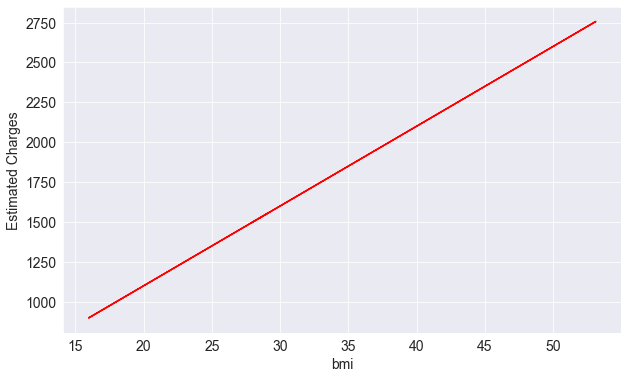

In [164]:
plt.plot(bmi, estimated_charges,color='r');#can add points using plt.plot(ages, estimated_charges,'r-o',color='r')
plt.xlabel('bmi');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line. 

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

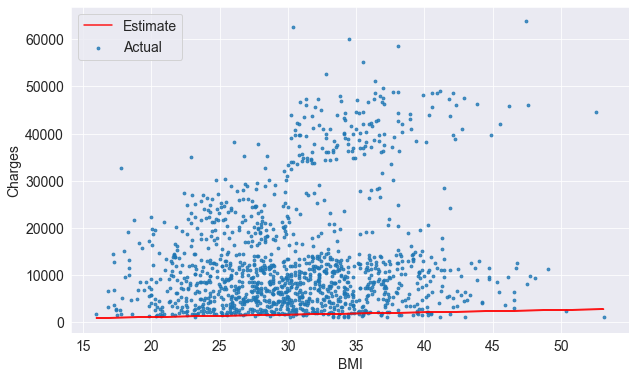

In [165]:
target = medical_df.charges

plt.plot(bmi, estimated_charges, 'r', alpha=0.9);

plt.scatter(bmi, target, s=8,alpha=0.8);
plt.xlabel('BMI');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [166]:
def try_parameters(w, b):
    bmi = medical_df.bmi
    target = medical_df.charges
    
    estimated_charges = estimate_charges(bmi, w, b)
    
    plt.plot(bmi, estimated_charges, 'r', alpha=0.9);
    plt.scatter(bmi, target, s=8,alpha=0.8);
    plt.xlabel('BMI');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

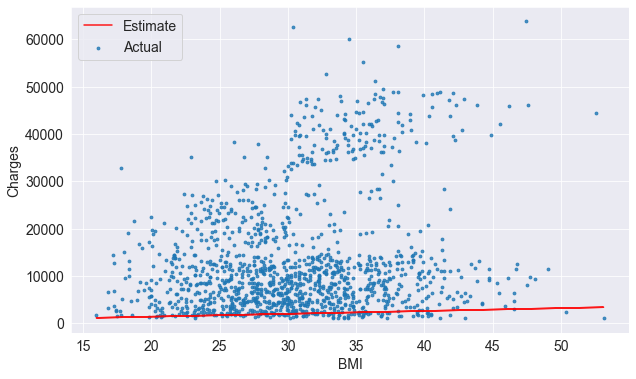

In [167]:
try_parameters(60, 200)

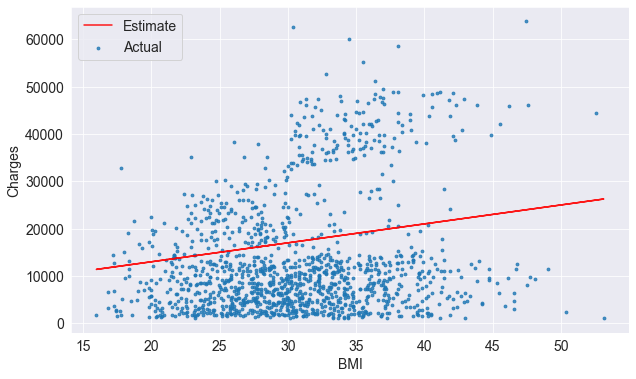

In [168]:
try_parameters(400, 5000)

> **EXERCISE**: Try various values of $w$ and $b$ to find a line that best fits the data. What is the effect of changing the value of $w$? What is the effect of changing $b$?

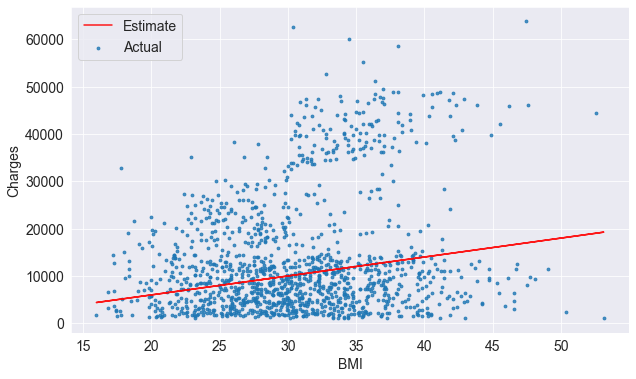

In [169]:
try_parameters(400,-2000)

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges". 

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

In [170]:
targets = medical_df.charges
targets

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [171]:
prediction = estimated_charges
prediction

0       1495.00
1       1788.50
2       1750.00
3       1235.25
4       1544.00
         ...   
1333    1648.50
1334    1696.00
1335    1942.50
1336    1390.00
1337    1553.50
Name: bmi, Length: 1338, dtype: float64

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [172]:
#defining a function for RMSE
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's compute the RMSE for our model with a sample set of weights

In [173]:
w = 50
b = 100

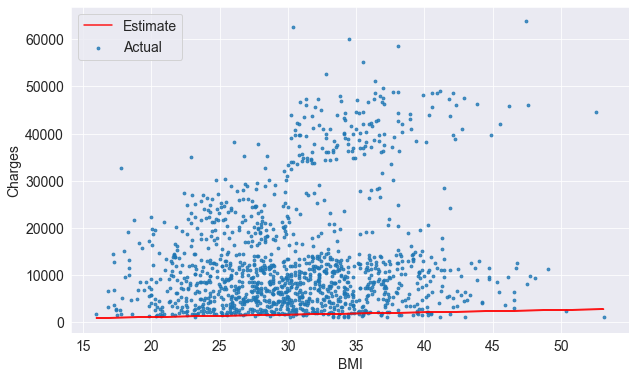

In [174]:
try_parameters(w, b)

In [175]:
targets = medical_df['charges']
predicted = estimate_charges(medical_df.bmi, w, b)

In [176]:
rmse(targets, predicted)

16751.049964932405

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$16751*. 

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [177]:
def try_parameters(w, b):
    bmi = medical_df.bmi
    target = medical_df.charges
    predictions = estimate_charges(bmi, w, b)
    
    plt.plot(bmi, predictions, 'r', alpha=0.9);
    plt.scatter(bmi, target, s=8,alpha=0.8);
    plt.xlabel('BMI');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss with BMI: ", loss)

RMSE Loss with BMI:  16751.049964932405


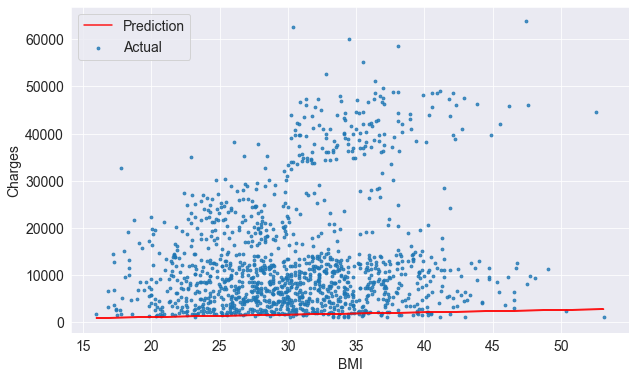

In [178]:
try_parameters(50, 100)

> **EXERCISE**: Try different values of $w$ and $b$ to minimize the RMSE loss. What's the lowest value of loss you are able to achieve? Can you come with a general strategy for finding better values of $w$ and $b$ by trial and error?

RMSE Loss with BMI:  13549.831104141575


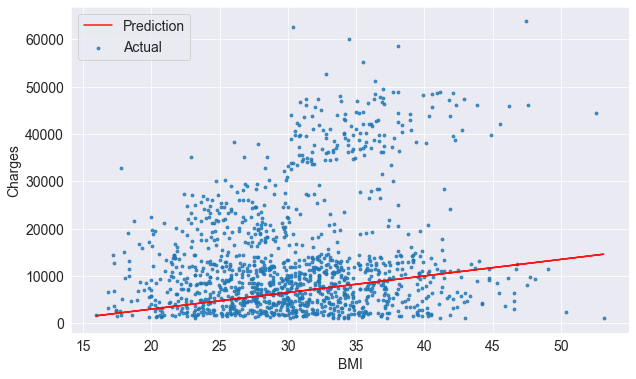

In [179]:
try_parameters(350, -4000)

Now, this time our weight(w) and bias (b) seems to be little better than previous ones as the overall loss is less than previous loss.

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points? What we we have done in previous few steps is Stochastic gradient descent. 



### Linear Regression (Simple with one variable) using Scikit-learn

In practice, you'll never need to implement either of the above methods yourself. You can use a library like `scikit-learn` to do this for you. 

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "bmi" vs. "charges" using the ordinary least squares optimization technique.

In [180]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [181]:
lr = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [182]:
help(lr.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [183]:
x = medical_df[['bmi']]
y = medical_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)

x.shape : (1338, 1)
y.shape : (1338,)


Let's fit the model to the data.

In [184]:
lr.fit(x,y)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [185]:
lr.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([10252.0169173 , 15766.23934846, 25219.1920876 ])

Do these values seem reasonable? Compare them with the scatter plot above.

Let's compute the predictions for the entire set of inputs

In [186]:
predictions = lr.predict(x)

In [187]:
predictions

array([12181.99476821, 14494.02945899, 14190.74722528, ...,
       15707.15839385, 11354.86140353, 12642.82621424])

Let's compute the RMSE loss to evaluate the model.

In [188]:
rmse(predictions,y)

11864.986308399495

Seems like our prediction is off by $11864 on average, which explanes the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [189]:
# w
lr.coef_

array([393.8730308])

In [190]:
# b
lr.intercept_

1192.9372089611516

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss with BMI:  11864.986308399495


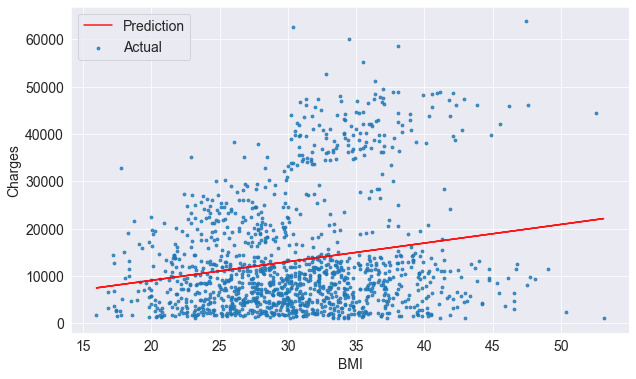

In [191]:
try_parameters(lr.coef_, lr.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers. 

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges with age. Visualize the targets and predictions, and compute the loss.

In [192]:
def estimate_charges2(age,w,b):
    return w * age + b

def try_parameters2(w, b):
    age = medical_df.age
    target = medical_df.charges
    predictions2 = estimate_charges2(age, w, b)
    
    plt.plot(age, predictions2, 'r', alpha=0.9);
    plt.scatter(age, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction2', 'Actual']);
    
    loss = rmse(target, predictions2)
    print("RMSE Loss with Age: ", loss)

In [193]:
x = medical_df[['age']]
y = medical_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)

x.shape : (1338, 1)
y.shape : (1338,)


In [194]:
lr.fit(x,y)

LinearRegression()

In [195]:
predictions2 = lr.predict(x)
predictions2

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

In [196]:
rmse(predictions2,y)

11551.665620756306

In [197]:
lr.coef_

array([257.72261867])

In [198]:
lr.intercept_

3165.8850060630157

RMSE Loss with Age:  11551.665620756306


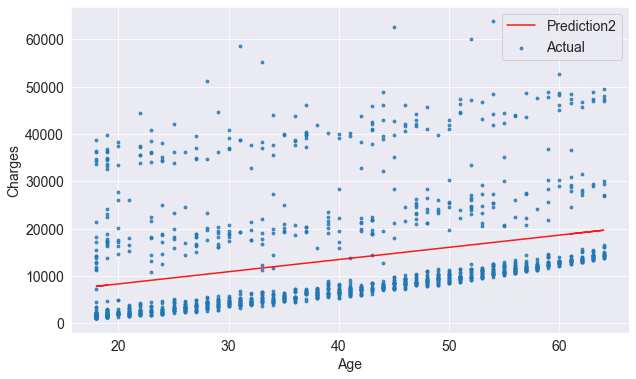

In [199]:
try_parameters2(lr.coef_,lr.intercept_)

In [200]:
print("RMSE Loss with BMI:",rmse(predictions,y))
print("RMSE Loss with Age:",rmse(predictions2,y))

RMSE Loss with BMI: 11864.986308399495
RMSE Loss with Age: 11551.665620756306


Thus we can see that rmse loss with 'age' is slightly less than with BMI.

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.

## Linear Regression using Multiple Features

So far, we've used on the "bmi" and "age" feature separately to estimate "charges". Now we should take "age", "bmi", "children" and "smoker" attributes all together as independent variables and then try to estimate the charges.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker+ b$

## Binary Category
The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


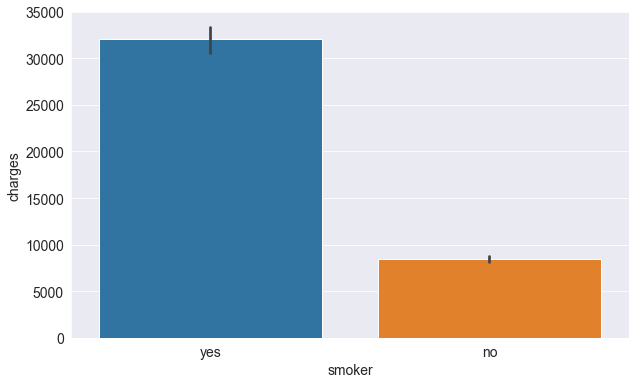

In [201]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [202]:
smoker_code = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)

In [203]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [204]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_code` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [205]:
x = medical_df[['age','bmi','children','smoker_code']]
y = medical_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)

x.shape : (1338, 4)
y.shape : (1338,)


In [206]:
lr.fit(x,y)

LinearRegression()

In [207]:
predictions3 = lr.predict(x)
predictions3

array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [208]:
rmse(predictions3,y)

6056.439217188078

The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.


Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<AxesSubplot:xlabel='sex', ylabel='charges'>

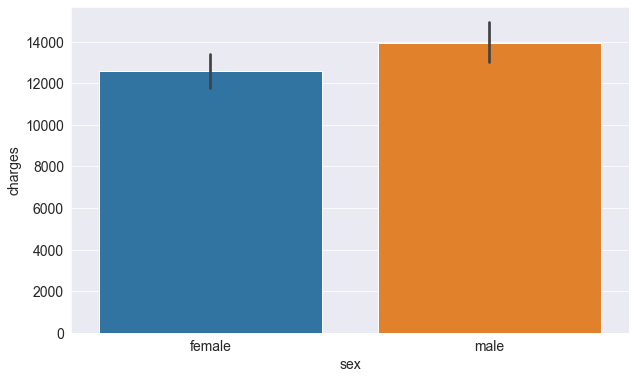

In [209]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [210]:
sex_codes = {'female': 0, 'male': 1}

In [211]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [212]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025415

In [213]:
x = medical_df[['age','bmi','children','smoker_code','sex_code']]
y = medical_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)

x.shape : (1338, 5)
y.shape : (1338,)


In [214]:
lr.fit(x,y)

LinearRegression()

In [215]:
predictions4 = lr.predict(x)
predictions4

array([25661.85689486,  3818.77858262,  7096.73025538, ...,
        4465.88909619,  1676.96948913, 36863.89250792])

In [216]:
rmse(predictions4,y)

6056.1007087545395

As you might expect, this does have a significant impact on the loss.

In [217]:
print("RMSE Loss with BMI:",rmse(predictions,y))
print("RMSE Loss with Age:",rmse(predictions2,y))
print("RMSE Loss with ABCS:",rmse(predictions3,y))
print("RMSE Loss with ABCSS:",rmse(predictions4,y))
#ABCS for age, bmi, children and smoker_code.
#ABCSS for age, bmi, children, smoker_code and sex_code.

RMSE Loss with BMI: 11864.986308399495
RMSE Loss with Age: 11551.665620756306
RMSE Loss with ABCS: 6056.439217188078
RMSE Loss with ABCSS: 6056.1007087545395


>## <p style="color:red">  *EXTRAS* - *Let's learn some more usefull concepts.*

### What is One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


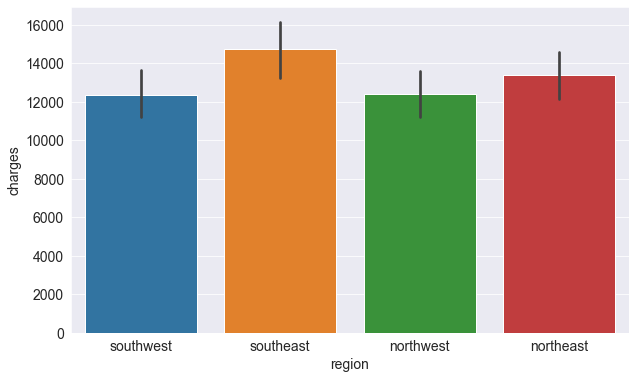

In [218]:
sns.barplot(data=medical_df, x='region', y='charges');

In [219]:
from sklearn.preprocessing import OneHotEncoder

In [220]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [221]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [222]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [223]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


You could see that each region has a separate column.

Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [224]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
 8   sex_code     1338 non-null   int64  
 9   northeast    1338 non-null   float64
 10  northwest    1338 non-null   float64
 11  southeast    1338 non-null   float64
 12  southwest    1338 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 136.0+ KB


In [225]:
medical_df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [226]:
x = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
y = medical_df.charges
print('x.shape :', x.shape)
print('y.shape :', y.shape)

x.shape : (1338, 9)
y.shape : (1338,)


In [227]:
lr=LinearRegression()

In [228]:
lr.fit(x,y)

LinearRegression()

In [229]:
predictions5 = lr.predict(x)
predictions5

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [230]:
rmse(predictions5,y)

6041.679651174455

In [231]:
print("RMSE Loss with BMI:",rmse(predictions,y))
print("RMSE Loss with Age:",rmse(predictions2,y))
print("RMSE Loss with ABCS:",rmse(predictions3,y))
print("RMSE Loss with ABCSS:",rmse(predictions4,y))
print("RMSE Loss with All:",rmse(predictions5,y))
#ABCS for age, bmi, children and smoker_code.
#ABCSS for age, bmi, children, smoker_code and sex_code.
#All for all attributes.

RMSE Loss with BMI: 11864.986308399495
RMSE Loss with Age: 11551.665620756306
RMSE Loss with ABCS: 6056.439217188078
RMSE Loss with ABCSS: 6056.1007087545395
RMSE Loss with All: 6041.679651174455


Once again, this leads to a fairly small reduction in the loss. 

#### Graphical representation of all the RMSE's

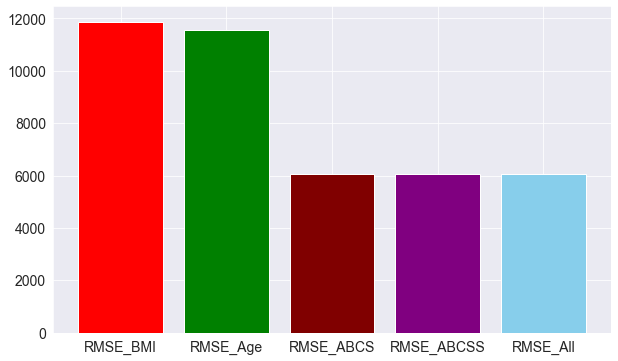

In [232]:
RMSE = {'RMSE_BMI':11864.986308399495, 'RMSE_Age':11551.665620756306, 'RMSE_ABCS':6056.439217188078, 
        'RMSE_ABCSS':6056.1007087545395, 'RMSE_All':6041.679651174455}

x1=list(RMSE.keys())
y=list(RMSE.values())

plt.bar(x1,y, color=('red','green','maroon','purple','skyblue'))
plt.show()

## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [233]:
lr.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [234]:
lr.intercept_

-12525.547811195454

In [235]:
weights_df = pd.DataFrame({
    'feature': np.append(x.keys(), 1),
    'weight': np.append(lr.coef_, lr.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [236]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [239]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [240]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [241]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now we combined with the categorical data

In [242]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [243]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174455


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [244]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, the most important feature are:

1. Smoker
2. Age
3. BMI


### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model.

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [251]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6099.14277827334


Let's compare this with the training loss.

In [248]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6036.558341813227


### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

Let's save our work before continuing.

## Revision Questions
1.	Why do we have to perform EDA before fitting a model to the data?
2.	What is a parameter?
3.	What is correlation?
4.	What does negative correlation mean?
5.	How can you find correlation between variables in Python?
6.	What is causation? Explain difference between correlation and causation with an example.
7.	Define Linear Regression.
8.	What is univariate linear regression?
9.	What is multivariate linear regression?
10.	What are weights and bias?
11.	What are inputs and targets?
12.	What is loss/cost function?
13.	What is residual? 
14.	What is RMSE value? When and why do we use it?
15.	What is an Optimizer? What are different types of optimizers? Explain each with an example.
16.	What library is available in Python to perform Linear Regression?
17.	What is <code>sklearn.linear_model </code>?
18.	What does <code>model.fit()</code> do? What arguments must be given?
19.	What does <code>model.predict()</code> do? What arguments must be given?
20.	How do we calculate RMSE values?
21.	What is <code>model.coef_</code>?
22.	What is <code>model.intercept_</code>?
23.	What is SGDRegressor? How is it different from Linear Regression?
24.	Define Machine Learning. What are the main components in Machine Learning?
25.	How does loss value help in determining whether the model is good or not?
26.	What are continuous and categorical variables?
27.	How do we handle categorical variables in Machine Learning? What are the common techniques?
28.	What is feature scaling? How does it help in Machine Learning?
29.	How do we perform scaling in Python?
30.	What is <code>sklearn.preprocessing</code>?
31.	What is a Test set?
32.	How do we split data for model fitting (training and testing) in Python?
33.	How do you approach a Machine Learning problem?